In [1]:
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Loading in our dataset as rdata (raw data)
rdata=datasets.load_wine()
rdata

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
#Thats very messy, so lets use the DESCR key to get a description of the dataset
print(rdata['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
#From the raw data (rdata), it looks like a dictionary, so lets print out the other key/value pairs to further explore the data
for key,value in rdata.items():
    print(key, value)

data [[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
target [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
frame None
target_names ['class_0' 'class_1' 'class_2']
DESCR .. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three clas

In [5]:
#Checking shape of the data. Important fields are 'data' and 'target'. Will only work on fields which are a string, otherwise an error will return
print(rdata['data'].shape)
print(rdata['target'].shape)
print(rdata['target_names'].shape)

(178, 13)
(178,)
(3,)


Looks like 178 samples in the rows, and 13 features in the columns. We will put this data into a pandas dataframe.

In [6]:
#Just to remind ourselves which features to include when building out pandas data frame. Feature_names will go into the columns (self explanatory), whilst data will be the data (based on the shape of the data, and aptly named as 'data')
print(rdata['feature_names'])
print(rdata['data'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [7]:
#Creating a pandas dataframe
rdata2 = pd.DataFrame(data=rdata['data'], columns=rdata['feature_names'])
data=rdata2
#Adding in an additional class column to act as our y variable later on
data['class']=rdata['target']
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
#Checking the data for any null data points. Note, summary statistics from rdata tells us this already but we want to double check for our new data
data.isnull().any()

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
class                           False
dtype: bool

<AxesSubplot:>

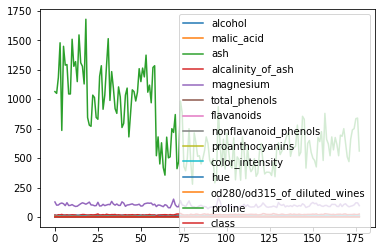

In [10]:
#Lets have a quick look at what the data looks like on a plot
data.plot()

Not very usefull. Lets plot them separately as seperate boxplots

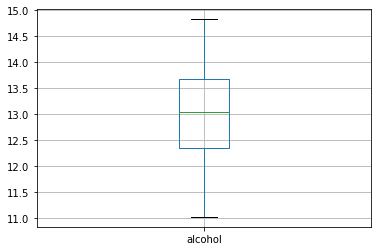

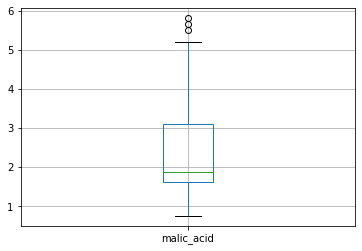

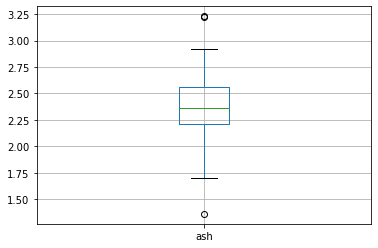

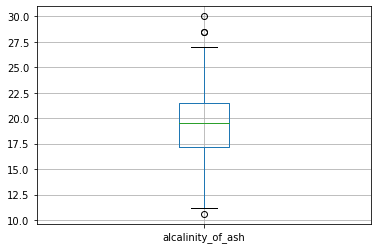

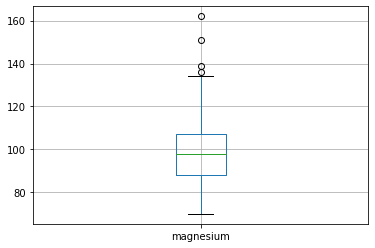

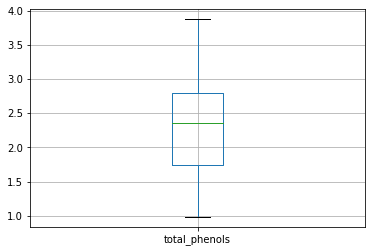

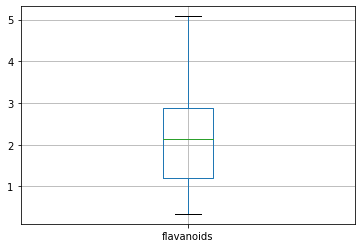

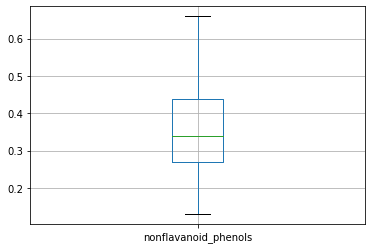

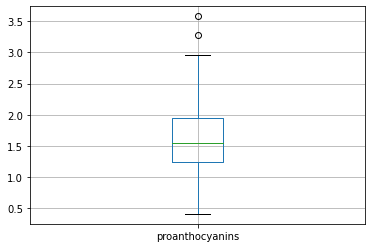

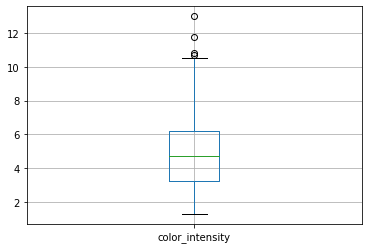

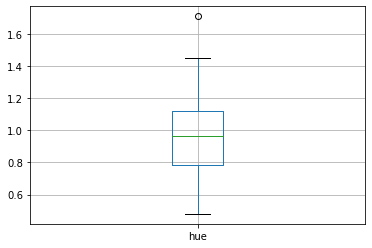

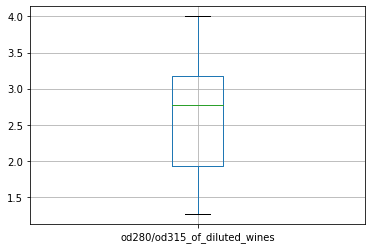

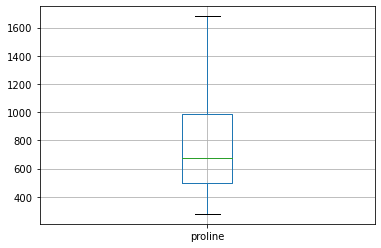

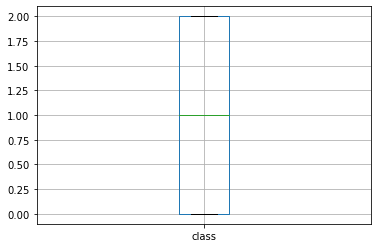

In [11]:
#Lets visualise each data column separately in a boxplot to look for any erraneous data points and get an overall shape of the data
for column in data:
    plt.figure()
    data.boxplot([column])

Couple of outliers for a couple of features, so lets remove these using an Inter Quartile Range (IQR) approach

In [12]:
#Using the IQR method, we now remove outliers from the features as identified in the above boxplots

#First print out the data shape of the original data with outliers included
print("Old shape: ", data.shape)

cols = ['malic_acid', 'ash', 'alcalinity_of_ash', 'proanthocyanins', 'magnesium', 'color_intensity', 'hue']

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

clean_data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
#Now print out the data shape of the new data with outliers removed. Doing this will confirm whether outliers have indeed been removed from our dataset
print("New shape: ", clean_data.shape)

Old shape:  (178, 14)
New shape:  (161, 14)


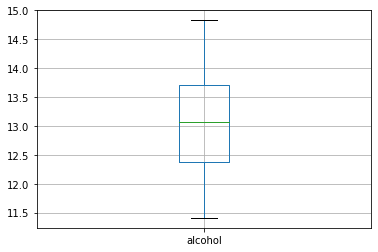

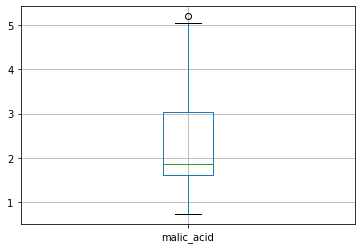

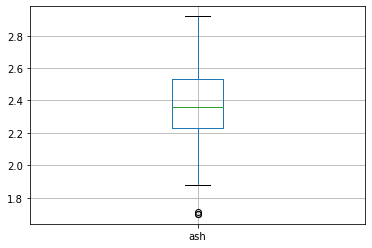

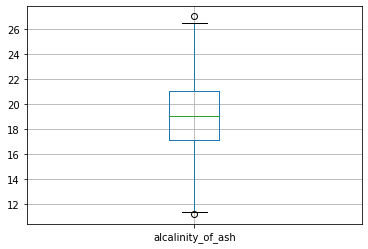

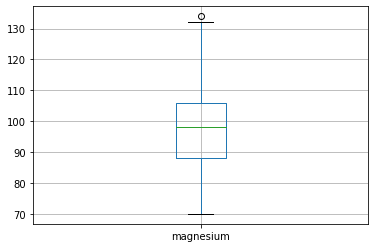

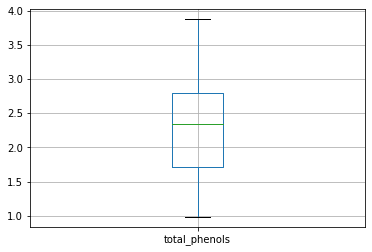

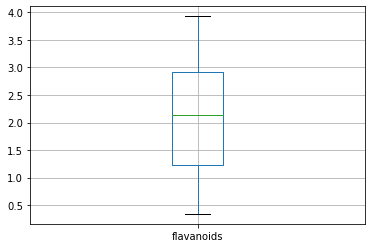

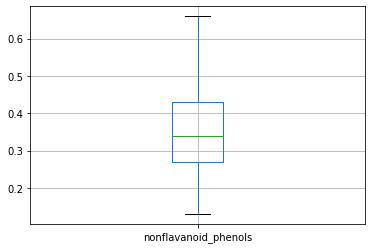

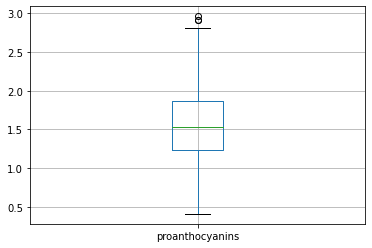

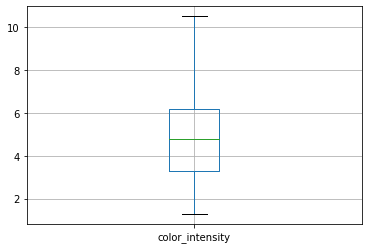

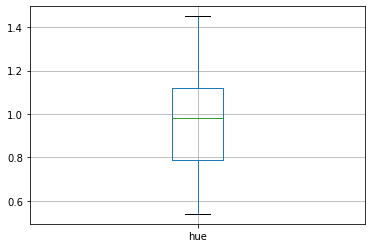

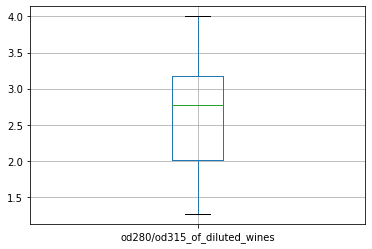

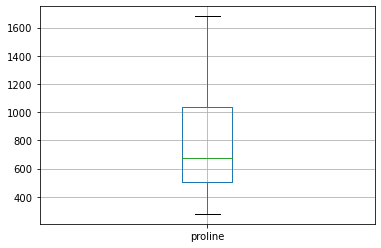

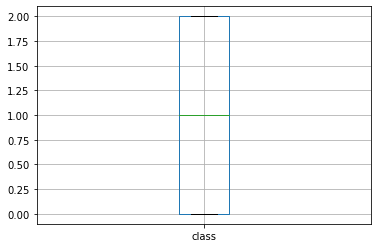

In [13]:
#Lets check the plots of the clean_data to see if this has changed anything
for column in data:
    plt.figure()
    clean_data.boxplot([column])

In [14]:
#Couple of outliers still remain, so lets then it through again

#Using the IQR method, we now remove outliers from the features as identified in the above boxplots

#First print out the data shape of the original data with outliers included
print("Old shape: ", clean_data.shape)

cols = ['malic_acid', 'ash', 'alcalinity_of_ash', 'proanthocyanins', 'magnesium', 'color_intensity', 'hue']

Q1 = clean_data[cols].quantile(0.25)
Q3 = clean_data[cols].quantile(0.75)
IQR = Q3 - Q1

cleaner_data = clean_data[~((clean_data[cols] < (Q1 - 1.5 * IQR)) |(clean_data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
#Now print out the data shape of the new data with outliers removed
print("New shape: ", cleaner_data.shape)

Old shape:  (161, 14)
New shape:  (151, 14)


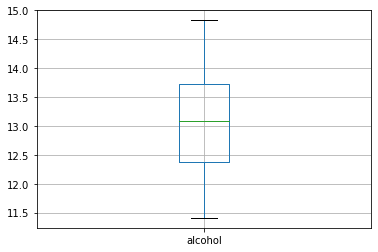

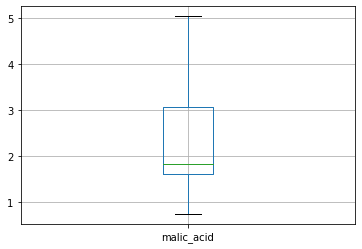

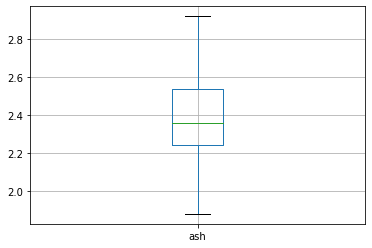

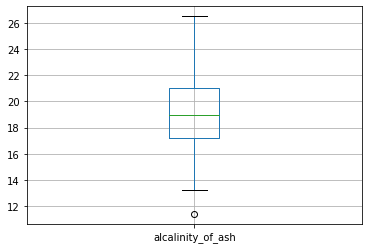

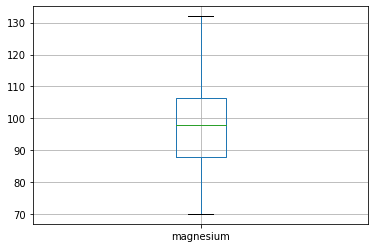

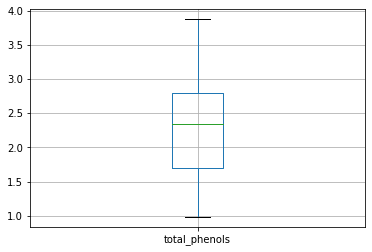

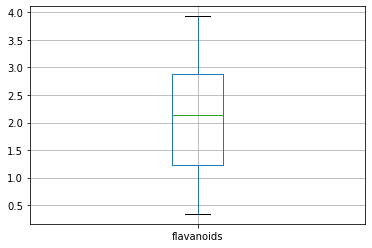

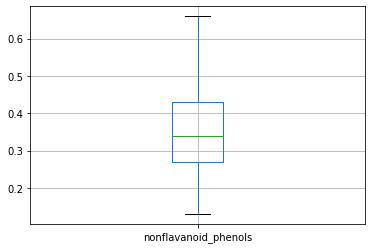

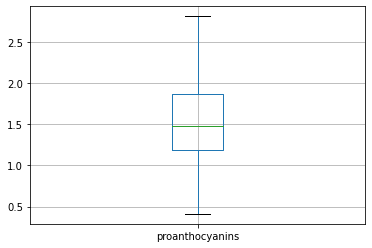

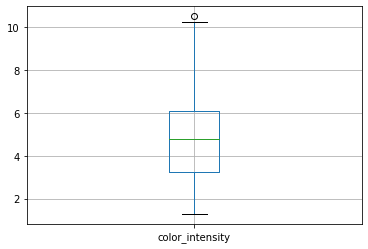

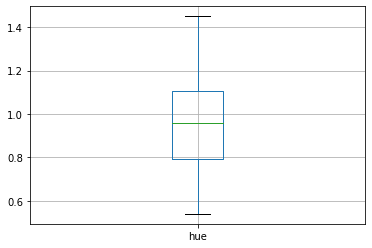

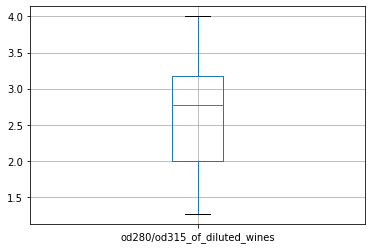

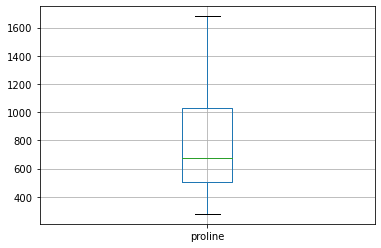

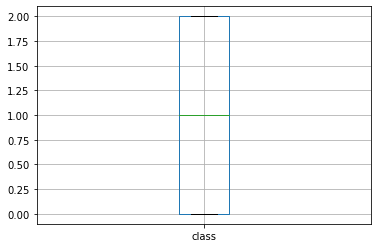

In [15]:
for column in data:
    plt.figure()
    cleaner_data.boxplot([column])

In [16]:
#Better, most outliers removed and the ones that remain are close to the upper/lower extremes of data

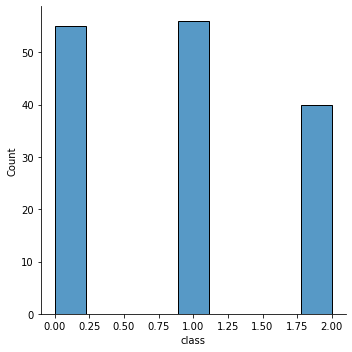

In [17]:
#Lets take a look at the distribution of the wines in each class
sns.displot(data=cleaner_data, x='class')

In [18]:
#Exploring how the variables correlate with each other
corr = cleaner_data.corr()
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
alcohol,1.000000,0.117210,0.254968,-0.357538,0.465436,0.336549,0.317409,-0.221344,0.255230,0.546251,-0.013175,0.126174,0.665364,-0.380010
malic_acid,0.117210,1.000000,0.140707,0.267183,0.029346,-0.376322,-0.458462,0.270561,-0.283345,0.295575,-0.560903,-0.397198,-0.189713,0.445551
ash,0.254968,0.140707,1.000000,0.240941,0.392736,0.161648,0.122720,0.034100,0.086771,0.224120,0.037583,0.017233,0.288567,-0.110808
alcalinity_of_ash,-0.357538,0.267183,0.240941,1.000000,-0.249622,-0.450509,-0.480470,0.288770,-0.304603,-0.071888,-0.274338,-0.346578,-0.505175,0.561307
magnesium,0.465436,0.029346,0.392736,-0.249622,1.000000,0.299691,0.266486,-0.258292,0.161362,0.386185,-0.014904,0.058776,0.467538,-0.276962
total_phenols,0.336549,-0.376322,0.161648,-0.450509,0.299691,1.000000,0.881913,-0.510027,0.651816,-0.049617,0.479006,0.698805,0.532946,-0.757688
flavanoids,0.317409,-0.458462,0.122720,-0.480470,0.266486,0.881913,1.000000,-0.593795,0.751555,-0.149948,0.589818,0.774979,0.552409,-0.887437
nonflavanoid_phenols,-0.221344,0.270561,0.034100,0.288770,-0.258292,-0.510027,-0.593795,1.000000,-0.418398,0.056478,-0.241335,-0.511742,-0.351428,0.492504
proanthocyanins,0.255230,-0.283345,0.086771,-0.304603,0.161362,0.651816,0.751555,-0.418398,1.000000,-0.041220,0.372702,0.598347,0.407195,-0.629672
color_intensity,0.546251,0.295575,0.224120,-0.071888,0.386185,-0.049617,-0.149948,0.056478,-0.041220,1.000000,-0.493690,-0.404277,0.367232,0.207112


<AxesSubplot:>

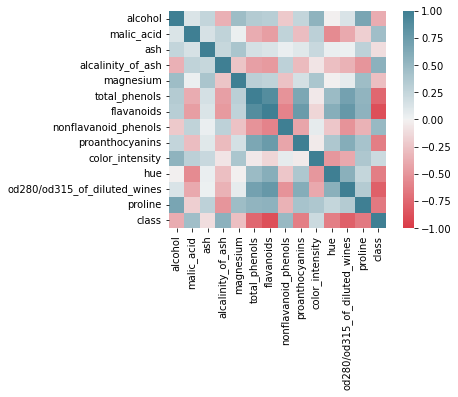

In [19]:
#Visualising the variables on a heatmap
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

alcohol


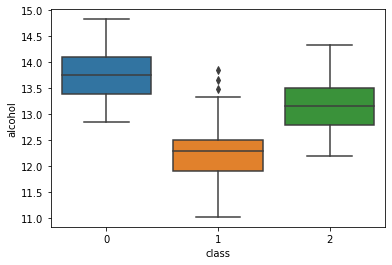

malic_acid


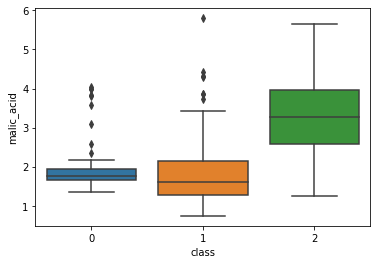

ash


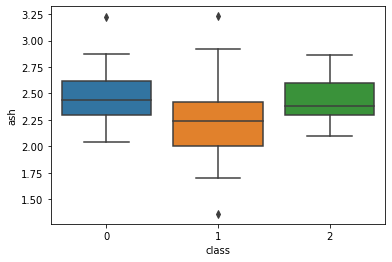

alcalinity_of_ash


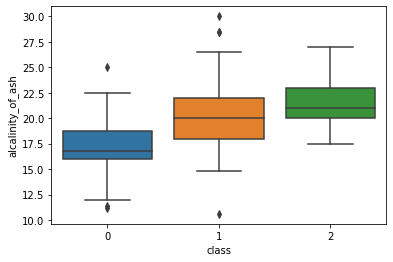

magnesium


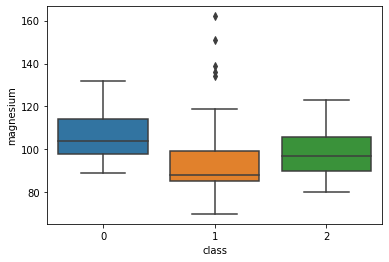

total_phenols


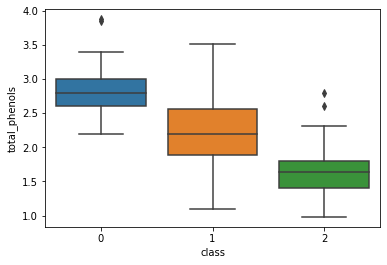

flavanoids


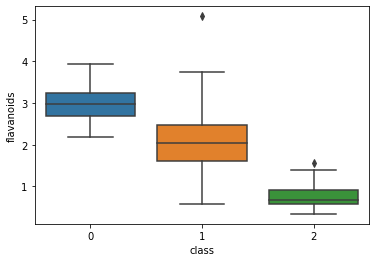

nonflavanoid_phenols


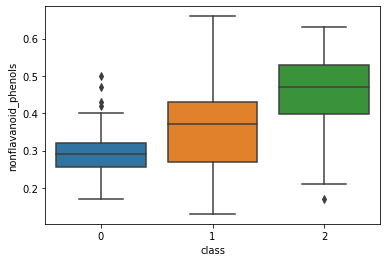

proanthocyanins


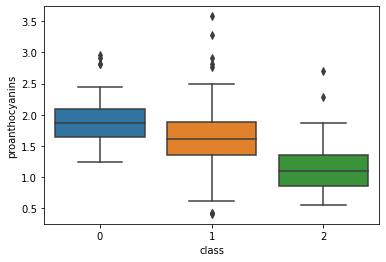

color_intensity


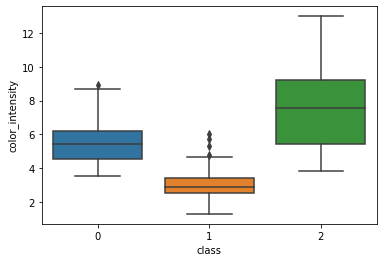

hue


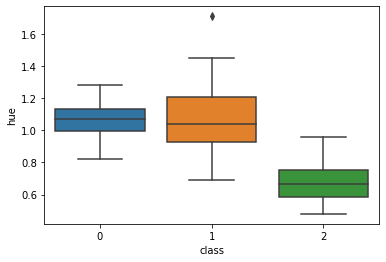

od280/od315_of_diluted_wines


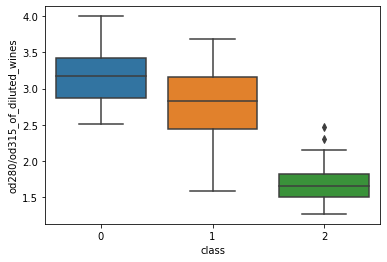

proline


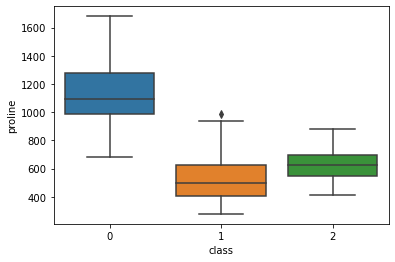

In [20]:
#Further graphical data exploration. What does the distribution of the data look like for each feature per class?
for feature in rdata['feature_names']:
    print (feature)
    sns.boxplot(y=feature,x='class',data=data)
    plt.show()

Looks like a few of the feature means separate themselves already into distinct groupings, such as based on alcohol, flavanoids and total_phenols. Lets try some machine learning approaches to see how accurately certain models can predict which class a particular wine belongs in based on the 13 features

In [21]:
#Split the data into training and test sets

In [22]:
#Remove the class feature from our X variable
X = data.drop('class',axis=1)
#Include only the class feature for our y varaible
y = data['class']
#Set the random state as 42 for reproducibility in running the code. Test size by default is 0.3 (30%) so no need to change this parameter
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)
#Applying a standard scaler to remove mean and scale to the unit variance
sc=preprocessing.StandardScaler().fit(train_X)
train_X_scaled=sc.transform(train_X)
test_X_scaled=sc.transform(test_X)
print(len(train_X),' samples in training data\n',
      len(test_X),' samples in test data\n', )

133  samples in training data
 45  samples in test data



In [23]:
#Comparison of the untransformed training data against the transformed data checking the mean has changed
print (train_X.mean(axis=0))
print (train_X_scaled.mean(axis=0))

alcohol                          12.972857
malic_acid                        2.386842
ash                               2.362180
alcalinity_of_ash                19.433835
magnesium                       100.759398
total_phenols                     2.277068
flavanoids                        2.021203
nonflavanoid_phenols              0.363534
proanthocyanins                   1.608647
color_intensity                   5.017594
hue                               0.959444
od280/od315_of_diluted_wines      2.610000
proline                         742.992481
dtype: float64
[ 2.68123034e-15  1.85732799e-17  1.79472143e-15  2.62947558e-17
 -2.98007233e-16  6.83246275e-16  8.66683500e-16 -7.55243821e-16
  4.67462326e-16  6.07701024e-16  1.74797520e-15  2.05349522e-16
  1.91993455e-17]


In [24]:
#Comparison of the untransformed training data against the transformed data checking the standard deviation has changed
print (train_X.std(axis=0))
print (train_X_scaled.std(axis=0))

alcohol                           0.829993
malic_acid                        1.098905
ash                               0.280606
alcalinity_of_ash                 3.467312
magnesium                        14.999571
total_phenols                     0.645696
flavanoids                        1.005537
nonflavanoid_phenols              0.126923
proanthocyanins                   0.576964
color_intensity                   2.202516
hue                               0.234545
od280/od315_of_diluted_wines      0.729961
proline                         306.867593
dtype: float64
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
#Same as above but for testing data
print (test_X.mean(axis=0))
print (test_X_scaled.mean(axis=0))

alcohol                          13.082667
malic_acid                        2.187111
ash                               2.379333
alcalinity_of_ash                19.675556
magnesium                        96.733333
total_phenols                     2.348444
flavanoids                        2.053111
nonflavanoid_phenols              0.356889
proanthocyanins                   1.538444
color_intensity                   5.177778
hue                               0.951556
od280/od315_of_diluted_wines      2.616667
proline                         758.422222
dtype: float64
[ 0.13280191 -0.18244178  0.06135903  0.06997779 -0.26942682  0.11096024
  0.03185237 -0.05255219 -0.12213514  0.0730026  -0.03375851  0.00916744
  0.05047153]


In [26]:
#Same as above but for testing data
print (test_X.std(axis=0))
print (test_X_scaled.std(axis=0))

alcohol                           0.758516
malic_acid                        1.169259
ash                               0.257536
alcalinity_of_ash                 2.958513
magnesium                        11.543199
total_phenols                     0.566564
flavanoids                        0.989676
nonflavanoid_phenols              0.118087
proanthocyanins                   0.561601
color_intensity                   2.654639
hue                               0.212335
od280/od315_of_diluted_wines      0.655165
proline                         340.933377
dtype: float64
[0.907088   1.05611112 0.91095858 0.84691419 0.76384687 0.87092316
 0.97690845 0.92347083 0.96613482 1.19631452 0.89857662 0.8908613
 1.10275092]


In [27]:
#Setting parameters to find optimal n_neighbours value. Arbitary value from 1 to 60 chosne.

parameters = {
    "n_neighbors" : range(1, 60),
}
model = GridSearchCV(KNeighborsClassifier(), parameters)
model.fit(train_X_scaled, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 60)})

In [28]:
#Generating a table of best parameter for N_neighbours
cv_results = pd.DataFrame(model.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
17,18,0.962393,0.023435,1
18,19,0.962393,0.023435,1
19,20,0.962393,0.023435,1
20,21,0.962393,0.023435,1
21,22,0.962393,0.023435,1
22,23,0.962393,0.023435,1
33,34,0.962108,0.024335,7
39,40,0.962108,0.024335,7
43,44,0.962108,0.024335,7
24,25,0.954986,0.036179,10


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

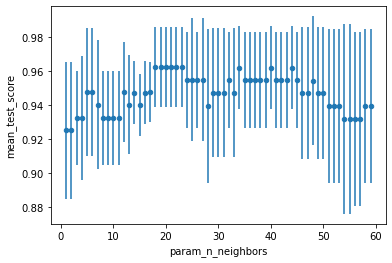

In [29]:
#Same as above but in graphical form, done by generating a scatter plot
cv_results = pd.DataFrame(model.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

In [30]:
#Create KNN Classifier. n=18 chosen from parameters identified above
knn = KNeighborsClassifier(n_neighbors=18)

#Train the model using the training sets
knn.fit(train_X_scaled, train_y)

#Predict the response for test dataset
pred_knn = knn.predict(test_X_scaled)

In [31]:
#Import scikit-learn metrics module for accuracy calculation using metrics from sklearn
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, pred_knn))

Accuracy: 0.9555555555555556


In [32]:
knn.score(test_X_scaled, pred_knn)

1.0

In [33]:
#Metrics for KNN. Higher score the better. Using mean_squared_error and r2_score
print(r2_score(test_y,pred_knn))
print(mean_squared_error(test_y,pred_knn))

0.9253731343283582
0.044444444444444446


In [34]:
#Generating metrics as a classification report, confusion matrix and model score
print(classification_report(test_y, pred_knn))
print(confusion_matrix(test_y, pred_knn))
print(model.score(test_X_scaled,test_y))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.89      0.94        18
           2       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 1 16  1]
 [ 0  0 12]]
0.9555555555555556


In [35]:
#Good accuracy scores, nearly at 1.00 for all classes (0,1,2)
#Confusion matrix tells us that the model predicted 15/15 wines in class 0, 16/18 in class 1 and 12/12 in class 2

Lets try different types of models and see how they perform - we will choose:
Random Forest Classifier (RFC)
Support Vector Classifier (SVC)
Multi-layer Perceptron Classifier (MLPC)

In [36]:
#Random forest classifier (RFC)
rfc = RandomForestClassifier(n_estimators=200) 
#Fitting the data for RFC
rfc.fit(train_X_scaled, train_y)
pred_rfc = rfc.predict(test_X_scaled)

In [37]:
#Support vector classifier (SVC)
#SVC has no additional parameters so can leave the () empty
clf = svm.SVC()
#Fitting the data for SVC
clf.fit(train_X_scaled, train_y)
pred_clf = clf.predict(test_X_scaled)

In [38]:
#Multi-Layer Perceptron Classifier (MLPC)
#Since we have 13 variables for wine classification, we will set the hidden_layer_sizes as 13
mlpc = MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500)
mlpc.fit(train_X_scaled, train_y)
pred_mlpc = mlpc.predict(test_X_scaled)

In [39]:
#Metrics for MLPC
print(r2_score(test_y,pred_mlpc))
print(mean_squared_error(test_y,pred_mlpc))

0.9626865671641791
0.022222222222222223


In [40]:
#Classification report, confusion matrix and model score for MLPC
print(classification_report(test_y, pred_mlpc))
print(confusion_matrix(test_y, pred_mlpc))
print(model.score(test_X_scaled,test_y))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.95      1.00      0.97        18
           2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[14  1  0]
 [ 0 18  0]
 [ 0  0 12]]
0.9555555555555556


In [41]:
#Generate a pandas dataframe of data to show which exact classes were correctly identified by the MLPC model
dfmlpc=pd.DataFrame({'Actual':pred_mlpc,'Predicted':test_y})
dfmlpc

,Actual,Predicted
19,0,0
45,0,0
140,2,2
30,0,0
67,1,1
16,0,0
119,1,1
174,2,2
109,1,1
141,2,2


In [42]:
#Metrics for RFC
print(r2_score(test_y,pred_rfc))
print(mean_squared_error(test_y,pred_rfc))

1.0
0.0


In [43]:
#Classification report, confusion matrix and model score for RFC
print(classification_report(test_y, pred_rfc))
print(confusion_matrix(test_y, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

[[15  0  0]
 [ 0 18  0]
 [ 0  0 12]]


In [44]:
#Generate a pandas dataframe of data to show which exact classes were correctly identified by the RFC model
dfrfc=pd.DataFrame({'Actual':pred_rfc,'Predicted':test_y})
dfrfc

,Actual,Predicted
19,0,0
45,0,0
140,2,2
30,0,0
67,1,1
16,0,0
119,1,1
174,2,2
109,1,1
141,2,2


In [45]:
#Metrics for SFC
print(r2_score(test_y,pred_clf))
print(mean_squared_error(test_y,pred_clf))

0.9626865671641791
0.022222222222222223


In [46]:
#Classification report, confusion matrix and model score for SVC
print(classification_report(test_y, pred_clf))
print(confusion_matrix(test_y, pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 18  0]
 [ 0  1 11]]


In [47]:
#Generate a pandas dataframe of data to show which exact classes were correctly identified by the SVC model
dfclf=pd.DataFrame({'Actual':pred_clf,'Predicted':test_y})
dfclf

,Actual,Predicted
19,0,0
45,0,0
140,2,2
30,0,0
67,1,1
16,0,0
119,1,1
174,2,2
109,1,1
141,2,2
